In [9]:
# Import all needed libraries

import requests
import pandas as pd
import seaborn as graph

In [10]:
# Get the list of all foods from the USDA server using their API

def getAllFoods():
    pageNum = 1
    foods = []
    while True:
        url = "https://api.nal.usda.gov/fdc/v1/foods/list?query=&pageSize=200&api_key=AwJ7dTgZCakbjiaZZEpPfFDfePveGTPewd8klxfv&pageNumber=" + str(pageNum)
        req = requests.get(url)
        if not req.ok:
            print("Connection error")
            break
        foods = foods + req.json()
        pageNum += 1
    
    return foods

In [11]:
list = getAllFoods()

Connection error


In [12]:
print(len(list))
print(list[0])

10000
{'fdcId': 2353623, 'description': 'A Low-Starch and High-Fiber Diet Intervention Impacts the Microbial Community of Raw Bovine Milk', 'dataType': 'Experimental', 'publicationDate': '2022-10-28', 'foodNutrients': []}


In [13]:
# Create a dictionary with only name and iron as entries
# { Name : name, Iron : iron}

def getIron():
    iron = []
    for food in list:
        name = food["description"]
        for nutrient in food["foodNutrients"]:
            if nutrient["name"] == "Iron, Fe":
                iron_amount = nutrient["amount"]
                temp = {"Name" : name, "Iron" : iron_amount}
                iron.append(temp)

    return iron

iron = getIron()

In [14]:
# Convert the iron dictionary into a DataFrame

data = pd.DataFrame(iron)
data.head(10)

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00
5,"Adobo, with noodles",0.99
6,"Adobo, with rice",1.34
7,Agave liquid sweetener,0.09
8,"Agave, cooked (Southwest)",3.55
9,"Agave, dried (Southwest)",3.64


In [15]:
# Sort the DataFrame by iron to get the greatest amount of iron

data = data.sort_values(by="Iron", ascending=False)
data.head(10)

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
370,"Babyfood, cereal, oatmeal, with honey, dry",67.2
363,"Babyfood, cereal, oatmeal, dry fortified",64.1
276,"Baby Toddler cereal, oatmeal, dry",64.1
364,"Babyfood, cereal, Oatmeal, dry, GERBER, SINGLE...",64.0
274,"Baby Toddler cereal, oatmeal with fruit, dry",61.0
8976,"Parsley, freeze-dried",53.9
373,"Babyfood, cereal, rice, dry fortified",53.0
280,"Baby Toddler cereal, rice, dry",53.0
278,"Baby Toddler cereal, rice with fruit, dry",50.4


In [25]:
# Remove all entries that are baby foods

data = data[data["Name"].str.contains("baby") == False]
data = data[data["Name"].str.contains("Baby") == False]

top10 = data.head(10)
top10

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
8976,"Parsley, freeze-dried",53.9
3451,"Cereals, QUAKER, Quick Oats with Iron, Dry",49.4
3248,"Cereal, O's, multigrain",46.6
1961,"Beef, variety meats and by-products, spleen, raw",44.6
3401,"Cereals, MALT-O-MEAL, chocolate, dry",42.9
3426,"Cereals, QUAKER, Instant Grits, Redeye Gravy &...",42.0
7711,"Lamb, variety meats and by-products, spleen, raw",41.9
3297,"Cereals ready-to-eat, MALT-O-MEAL, OAT BLENDER...",41.4
3403,"Cereals, MALT-O-MEAL, Farina Hot Wheat Cereal,...",40.9


<AxesSubplot:xlabel='Iron', ylabel='Name'>

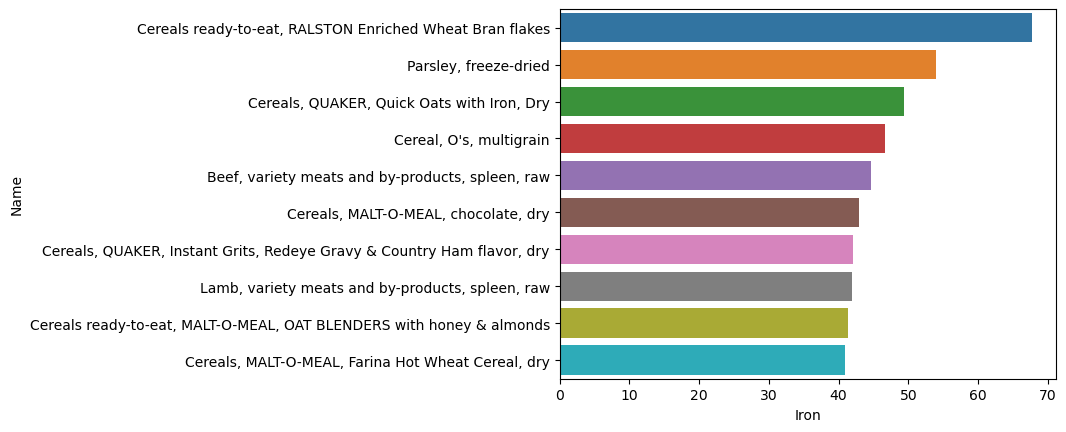

In [26]:
# Plot the data
graph.barplot(x=top10["Iron"], y=top10["Name"])

<AxesSubplot:ylabel='Count'>

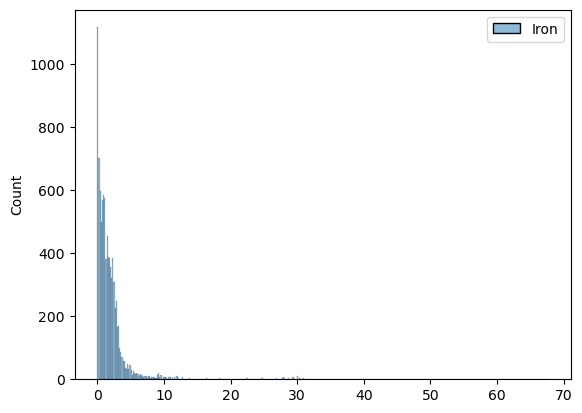

In [27]:
graph.histplot(data=data)

In [36]:
data["Iron"].quantile(0.99906)

40.90774000000001